In [1]:
import torch
import cv2

from models.networks import face_detection
from models.networks import face_recognition
from models.utils import match_embds
from datasets.utils import plot_face


    

In [2]:
img1 = cv2.imread('data/got/got.jpg')
img2 = cv2.imread('data/got/got2.jpg')

In [3]:
mtcnn = face_detection.load_model()
resnet = face_recognition.model_init('models/model_weights/face_recog/vggface2.pt')

In [4]:
faces1 = mtcnn(img1)
faces2 = mtcnn(img2)

/usr/local/lib/python3.8/site-packages/facenet_pytorch/models/utils/detect_face.py:183: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629395347/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  mask_inds = mask.nonzero()


In [5]:
i = 4
main_img = faces1[i].unsqueeze(0)

In [6]:
with torch.no_grad():
    resnet.eval()
    main_embd = resnet(main_img)
    target_embd = resnet(faces2)
    j = match_embds(main_embd, target_embd).item()
    
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


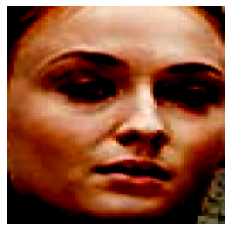

In [7]:
plot_face(faces2[j])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


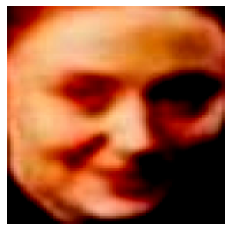

In [8]:
plot_face(faces1[i])